In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Part a & b
dataset=pd.read_csv("student_results.csv")
dataset=dataset.fillna(0)

In [9]:
# Part c
x = np.asarray([[0.07],
            [0.03],
            [0.03],
            [0.02],
            [0.03],
            [0.02],
            [0.024],
            [0.016],
            [0.07],
            [0.03],
            [0.04],
            [0.02],
            [0.6]])
y = dataset.iloc[:,1:14]
dataset['Total.marks']=np.dot(y, x)

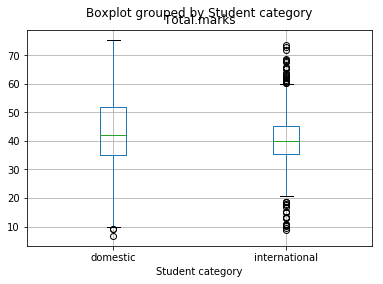

In [10]:
# Part c plotting
import matplotlib.pyplot as plt
%matplotlib inline
dataset.boxplot(column="Total.marks",by="Student category")

In [11]:
#Part d:
#Mean:
mean = dataset.groupby("Class No")["Total.marks"].mean()
#OR 
meanmark = dataset[["Class No","Total.marks"]].groupby("Class No").mean()
#Std:
std = dataset.groupby("Class No")["Total.marks"].std()
#Variance
var = dataset.groupby("Class No")["Total.marks"].var()

#Put in a table:
n = len(dataset)
Stat_table = dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').agg({'mean', 'var', 'std'})
print('Stat table:\n', Stat_table)

Stat table:
          Total.marks                       
                 std       mean         var
Class No                                   
1          13.364902  42.876214  178.620609
2          11.059056  44.123086  122.302730
3          12.944430  42.430972  167.558258
4          14.126517  40.767150  199.558478
5          16.605419  41.912205  275.739946
6          14.485685  45.709985  209.835058
7          15.246803  40.100941  232.465010
8          15.152099  38.886314  229.586092
9          12.372940  39.527421  153.089643
10         14.335759  44.128466  205.513988
11         16.013469  38.279556  256.431192
12         12.011609  42.243336  144.278754
15         13.418560  41.480103  180.057757
16         11.161081  43.727392  124.569736
17         12.496263  41.225111  156.156584
18         13.452483  42.989004  180.969294
19          8.418077  40.264303   70.864026
20         10.894623  40.765801  118.692811
21         12.686117  40.809419  160.937555


In [12]:
#Part e:
Description = ['Fail', 'Pass', 'Credit', 'Distinction', 'High Distinction']
Grade_Range = [0, 50, 65, 75, 85, 100.01]
dataset['Grade'] = pd.cut(dataset['Total.marks'], right = False, bins = Grade_Range, labels = Description)

The coefficents of the simple linear regression is: [[0.27686542]]
The intercept of the simple linear regression is: [37.05858158]


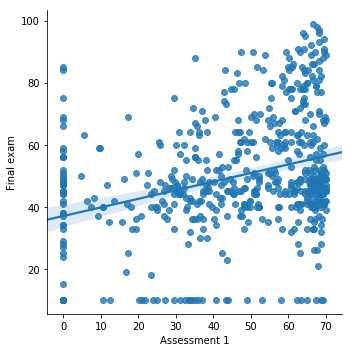

In [13]:
#Part f:
#Simple regression with Final.exam as the response and Assessment.1 as the predictor:
Simple_Regression = LinearRegression(fit_intercept = True)
Predictor = dataset[['Assessment 1']]
Response = dataset[['Final exam']]
Simple_Regression.fit(Predictor, Response)
print('The coefficents of the simple linear regression is:', Simple_Regression.coef_)
print('The intercept of the simple linear regression is:', Simple_Regression.intercept_)
df = pd.DataFrame(dataset.loc[0:n, ['Final exam', 'Assessment 1']])
sb.lmplot("Assessment 1", "Final exam", df)

In [14]:
#Part g:
#Multiple regression:
Multiple_Regression = LinearRegression(fit_intercept = True)
Predictor = dataset[['Assessment 1', 'Assessment 3', 'Online quiz 1 ', 'Group assignment 2']]
Response = dataset['Final exam']
Multiple_Regression.fit(Predictor, Response)
print('The coefficents of the multiple regression is:', Multiple_Regression.coef_)
print('The intercept of the simple linear regression is:', Multiple_Regression.intercept_)

The coefficents of the multiple regression is: [0.15705846 0.20300944 0.14651308 0.3466355 ]
The intercept of the simple linear regression is: 25.829968920832513


In [18]:
#Part h:
#Setting status:
dataset.loc[dataset['Grade'] == 'Fail', 'Status'] = 'Incomplete'
dataset.loc[dataset['Grade'] != 'Fail', 'Status'] = 'Complete'
#Fitting logistic regression:
#Training data:
a = dataset.loc[0:99, ['Assessment 3']]
b = dataset.loc[0:99, ['Status']]
#Testing data:
c = dataset.loc[100:n, ['Assessment 3']]
d = dataset.loc[100:n, ['Status']]
#Logistic regression:
logistic_regression = LogisticRegression()
logistic_regression.fit(a, b.values.ravel())
#Confusion matrix:
predictions = logr.predict(c)
Confusion_matrix = metrics.confusion_matrix(d, predictions)
print(Confusion_matrix)

[[  0 110]
 [  0 368]]
